In [36]:
import tensorflow as tf
 
data = tf.keras.datasets.cifar10
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
(x_train, y_train), (x_test, y_test) = data.load_data()

x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255 

[6]


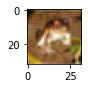

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (1,1))
plt.imshow(x_train[0])
print(y_train[0])

In [42]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1563/1563 [==============================] - 70s 44ms/step - loss: 1.6302 - accuracy: 0.4045
Epoch 2/30
1563/1563 [==============================] - 73s 47ms/step - loss: 1.3294 - accuracy: 0.5243
Epoch 3/30
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2086 - accuracy: 0.5718
Epoch 4/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1143 - accuracy: 0.6103
Epoch 5/30
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0546 - accuracy: 0.6307
Epoch 6/30
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0026 - accuracy: 0.6463
Epoch 7/30
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9603 - accuracy: 0.6632
Epoch 8/30
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9290 - accuracy: 0.6764
Epoch 9/30
1563/1563 [==============================] - 82s 52ms/step - loss: 0.8931 - accuracy: 0.6872
Epoch 10/30
1563/1563 [==============================] - 87s 56m

In [46]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.9586 - accuracy: 0.6829
0.9585935473442078 0.6829000115394592


In [47]:
predictions = model.predict([x_test])
import numpy as np
print(np.argmax(predictions[0]))

313/313 [==============================] - 4s 12ms/step
3


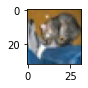

'cat'

In [48]:
plt.figure(figsize = (1,1))
plt.imshow(x_test[0])
plt.show()
classes[np.argmax(predictions[0])]